In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df=pd.read_csv(r'Data\Housprice.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


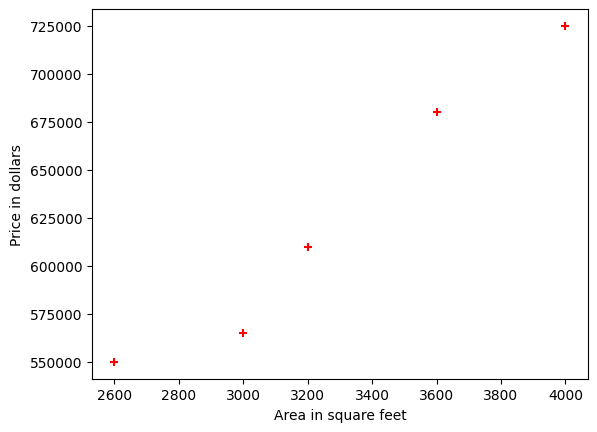

In [9]:
%matplotlib inline
plt.xlabel('Area in square feet')
plt.ylabel('Price in dollars')
plt.scatter(df.area,df.price,color='red',marker='+')

In [10]:
reg = linear_model.LinearRegression() #creating a linear regression object
reg.fit(df[['area']],df.price) #training the model with the available data

LinearRegression()

In [11]:
reg.predict([[3300]]) #predicting the price of a house with 3300 square feet area

c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
reg.coef_ #slope of the line

array([135.78767123])

In [13]:

reg.intercept_ #y-intercept of the line

180616.43835616432

In [14]:
#y = mx + c
y = 135.78767123 * 3300 + 180616.43835616432
print(y) #price of a house with 3300 square feet area

628715.7534151643


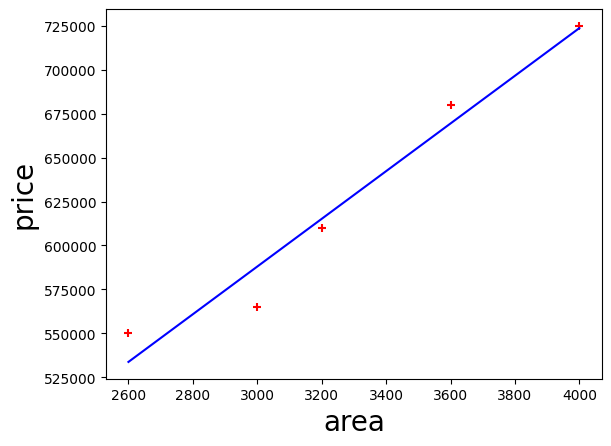

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [16]:
d = pd.read_csv(r'Data\Housprice.csv')
d.head(3)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000


In [27]:
p = reg.predict(d[['area']]) #predicting the prices for all the houses in the dataset
d['prices'] = p
d.to_csv(r'Data\predicted.csv',index=False) #saving the predicted prices to a new csv file

In [22]:
import pickle
#pickle module allows you to serialize and deserialize Python objects into a file

if you have more numpy arrays you can also use joblib from sklearn to save trained models to a file.

In [ ]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f) #saving the trained model to a file so that it can be used later without retraining

In [24]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f) #loading the model from the file

In [25]:
mp.predict([[3300]]) #predicting the price of a house with 3300 square feet area using the loaded model

c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [30]:
import joblib

In [31]:
joblib.dump(reg,'model_joblib') #saving the trained model using joblib

['model_joblib']

In [32]:
mj = joblib.load('model_joblib') #loading the model using joblib
mj.predict([[5000]])

c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [33]:
mj.coef_, mj.intercept_ #slope and y-intercept of the line using joblib loaded model

(array([135.78767123]), 180616.43835616432)